In [1]:
import pandas as pd
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
#import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')

In [2]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../resources/hawaii.sqlite")
conn = engine.connect()

# Reflect Tables into SQLAlchemy ORM

In [3]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [4]:
Measurements = Base.classes.measurement
Stations = Base.classes.station
session = Session(engine)

# Exploratory Precipitation Analysis

In [5]:
#firstrow = session.query(Measurements).first()
#firstrow.__dict__

In [6]:
newest_measurement_date_string = session.query(Measurements, func.max(Measurements.date).label('date')).first().date
year_back = datetime.strptime(newest_measurement_date_string,'%Y-%m-%d') + relativedelta(months=-12)

In [7]:
stmt = session.query(Measurements).filter(Measurements.date >= year_back).statement

In [8]:
PrecipDF = pd.read_sql_query(stmt, session.bind)[["date","prcp"]]
session.close()

PrecipDF = PrecipDF[PrecipDF["prcp"].notna()].sort_values("date")
PrecipGroupDF = PrecipDF.groupby("date").sum("prcp")
PrecipGroupDF.index = pd.to_datetime(PrecipGroupDF.index)
PrecipGroupDF.columns=["precipitation"]

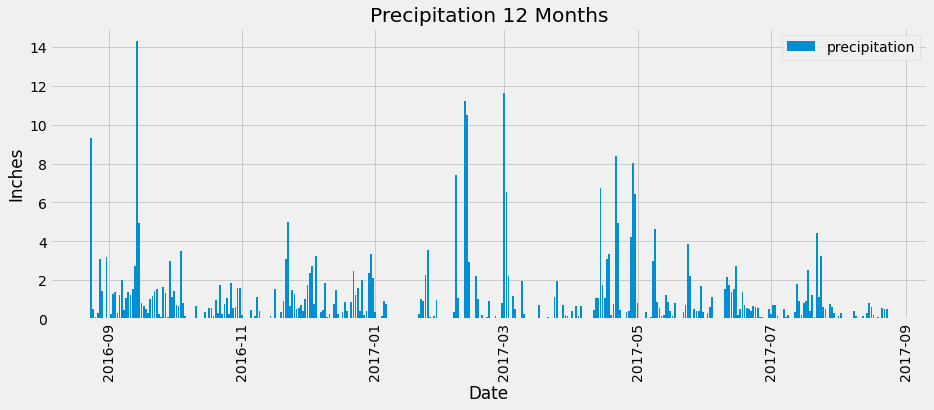

In [9]:
dates = PrecipGroupDF.index.values
precipitation = PrecipGroupDF["precipitation"]

fig = plt.figure(figsize = (14, 5))
ax = fig.add_subplot()

plt.bar(dates, precipitation)

plt.title("Precipitation 12 Months")
plt.ylabel("Inches") 
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.legend([plt.Rectangle((0,0),1,1)], ["precipitation"])

plt.show()

In [10]:
PrecipGroupDF.describe()

,precipitation
count,365.000000
mean,0.974164
std,1.776466
min,0.000000
25%,0.050000
50%,0.400000
75%,1.080000
max,14.280000
